In [24]:
import pandas as pd
import numpy as np
from sklearn.impute import SimpleImputer
from numpy import loadtxt
from xgboost import XGBClassifier
from matplotlib import pyplot
from xgboost import plot_importance
import pandas as pd
import numpy as np
from sklearn.linear_model import Lasso


In [25]:
df = pd.read_excel('/home/yx/3090/project/P_prediction/Data/肺部并发症预测/肺部并发症分析数据-日期排序(1).xlsx')

In [26]:
df_X = df.drop([
'Unnamed: 0', '手麻手术排程ID','住院号','身高:cm','体重:kg','屏气试验_不适用','呼吸困难_与体位的关系',
'戒烟','一秒用力呼气容积（FEV1）/用力肺活量(FVC)','一秒用力呼气容积（FEV1）/预计值',
'血气分析_FiO2','颅内出血_选择','颅内高压','脑疝','是否精神认知异常','神经肌肉系统疾病','甲状腺功能异常_选择','治疗',
'糖尿病_血糖水平_前三项','糖尿病_血糖水平_后两项','嗜铬细胞瘤','腹水','分期','透析','既往困难通气史','既往困难插管史',
'张口低于二横指_选择','下颌前伸','颈部活动<90°_选择','睡眠呼吸暂停综合征','呼吸道梗阻','纵膈病史选择','呼吸道梗阻_选择',
'术后恶心呕吐','华法林停药时间','阿司匹林停药时间','氯吡格雷停药时间','肿瘤治疗','手术类型_血管内介入手术','手术风险评估_预计失血量',
'华西围术期风险评分','通气困难评分','插管困难评分','心血管不良事件风险','肺部并发症风险','卒中风险','术后谵妄风险',
'急性肾损伤风险','术后恶心呕吐风险','术后中重度疼痛','心功能_不适用','运动当量_不适用','心电图检查结果选项','辅助性检查_LV',
'辅助性检查_RV','辅助性检查_SV','辅助性检查_EF','辅助性检查_肺动脉压','高血压利血平停药时间','缺血性心脏病_检查','是否患心脏瓣膜病',
'先天性心脏病_选择','扩张性心肌病','扩张性心肌病_选择','肥厚型心肌病_选择','是否低危型','是否中危型','是否高危型',
'心源性晕厥史','安置起搏器_选择','主动脉夹层_选择','是否动脉疾病','是否静脉疾病','是否有心包疾病','出血_近1周消化道出血病史_选择_下消化道',
'出血_近1周消化道出血病史_选择_上消化道','胃食管反流','消化性溃疡','戒酒时间','其他消化系统疾病','是否凝血功能异常','是否其他血液疾病',
'是否过敏','是否免疫功能障碍','是否自身免疫性疾病','访视类型','手术开始日期','手术结束日期','促甲状腺激素受体抗体','尿蛋白定量','抗甲状腺过氧化物酶抗体',
'甲状腺球蛋白','空腹C肽','血氨','血糖','酮体定性','餐后2小时C肽','心肌缺血','心脏骤停','心力衰竭','死亡','高危心律失常','卒中',
'严重心血管不良','急性肾损伤','肺不张','肺水肿','气胸','液（血）胸','肺部感染','肺栓塞','拔管延迟或困难','呼吸衰竭',
'术后谵妄','中重度疼痛','术后恶心呕吐_结局','低氧血症_只在旧版数据','急性呼吸窘迫综合征_只在旧版数据','呼吸抑制_只在新版数据',
'患者姓名','诊断','手术名称','手术开始时间_术中','手术结束时间_术中','麻醉开始时间_术中','麻醉结束时间_术中','麻醉时长（分钟）',
'人工气道类型','手术日期与哮喘上次发作日期时间差','手术日期_充血性心力衰竭上次发作日期','拟行手术','手术风险评估_预计手术时间'
], axis=1)

In [27]:
df_X

,性别,BMI,收缩压,舒张压,呼吸,心率,体温,是否使用活性药物,急诊/择期,一般情况,...,门冬氨酸氨基转移酶,间接胆红素,阴离子间隙,降钙素原,高密度脂蛋白,肺部并发症,年龄_术中,ASA分级,手术时长（分钟）,出血量
0,2,25.203981,129.0,81.0,20.0,110.0,36.4,0,0,2.0,...,10.0,3.5,16.6,NaN,1.41,0,67,3,230.316667,NaN
1,1,26.757812,123.0,79.0,20.0,74.0,36.5,0,0,1.0,...,54.0,13.0,16.4,NaN,0.98,0,66,3,288.216667,NaN
2,1,20.213384,114.0,66.0,20.0,50.0,35.7,0,0,1.0,...,60.0,4.5,19.2,0.10,1.15,0,70,3,70.033333,NaN
3,1,23.051755,117.0,77.0,20.0,78.0,36.5,0,0,2.0,...,36.0,17.8,19.1,NaN,1.44,0,82,2,100.000000,NaN
4,1,15.943878,124.0,70.0,20.0,80.0,36.7,0,0,2.0,...,25.0,6.8,17.0,NaN,1.56,0,73,2,34.983333,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17352,2,22.558610,135.0,69.0,18.0,91.0,36.3,0,0,1.0,...,14.0,7.8,14.6,NaN,1.44,0,69,2,399.333333,NaN
17353,1,22.761468,157.0,71.0,20.0,75.0,36.3,0,0,1.0,...,13.0,4.9,14.0,NaN,1.01,0,75,3,204.950000,NaN
17354,2,27.005131,125.0,74.0,20.0,84.0,36.5,0,0,2.0,...,20.0,13.3,22.7,NaN,1.10,0,82,3,89.333333,NaN
17355,1,29.136316,132.0,71.0,14.0,82.0,36.5,0,0,1.0,...,35.0,5.1,17.2,NaN,0.73,0,69,3,60.750000,NaN


In [28]:
text = df_X.pop('术前诊断(head_pd)')

In [29]:
df_X_qs = df_X.drop([
'反三碘甲状腺原氨酸','25-羟基维生素D','抗甲状腺球蛋白抗体','肿瘤坏死因子α','糖化血红蛋白A1c',
'尿钠素','降钙素原','三碘甲状腺原氨酸','甲状腺素','游离三碘甲状腺原氨酸','促甲状腺刺激激素',
'氧分压','碳酸氢根','缓冲碱','酸碱度','氧合血红蛋白浓度','二氧化碳分压','全血乳酸',
'全血碱剩余','游离甲状腺素','血沉','白细胞介素6','肌酸激酶同功酶MB质量','肌红蛋白','肌钙蛋白-T',
'纤维蛋白及纤维蛋白原降解产物','D-二聚体','C-反应蛋白','上皮细胞','尿胆原定性','尿胆红素定性',
'尿葡萄糖','尿蛋白定性','比重'
], axis=1)

In [13]:
df_X_qs.to_pickle('/home/yx/3090/project/P_prediction/Data/肺部并发症预测/data_time.pkl')

In [77]:
def get_null_rate(df_X):
    data = pd.DataFrame(((df_X.isnull().sum())/df_X.shape[0]).sort_values(ascending=False).map(lambda x:"{:.2%}".format(x)))
    return data

In [78]:
y

0        0
1        0
2        0
3        1
4        0
        ..
17367    0
17368    0
17369    0
17370    0
17371    0
Name: 肺部并发症, Length: 17372, dtype: int64

In [79]:
data = []
for i in df_X_qs['手术时长（分钟）']:
    if i< 120 :
        data.append(1)
    elif i < 240:
        data.append(2)
    else:
        data.append(3)
df_X_qs['手术时间_分级'] = data

In [80]:
df_X_qs

,性别,BMI,收缩压,舒张压,呼吸,心率,体温,是否使用活性药物,急诊/择期,一般情况,...,镁,门冬氨酸氨基转移酶,间接胆红素,阴离子间隙,高密度脂蛋白,年龄_术中,ASA分级,手术时长（分钟）,出血量,手术时间_分级
0,1,22.100290,144.0,85.0,20.0,80.0,36.0,0,0,1.0,...,0.82,16.0,9.4,19.6,1.59,73,2,160.100000,NaN,2
1,1,21.453287,127.0,73.0,20.0,76.0,36.7,0,0,1.0,...,0.84,30.0,12.3,20.1,1.63,71,3,170.050000,NaN,2
2,2,22.806017,128.0,78.0,20.0,78.0,36.5,0,0,1.0,...,0.91,24.0,14.0,22.2,1.72,77,2,125.666667,NaN,2
3,2,24.973985,158.0,97.0,20.0,87.0,36.0,0,0,1.0,...,0.95,23.0,5.3,19.9,1.42,72,3,144.833333,NaN,2
4,2,24.444444,126.0,90.0,20.0,96.0,36.7,0,0,1.0,...,0.89,105.0,9.1,18.0,1.04,66,2,285.100000,NaN,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17367,2,27.005131,125.0,74.0,20.0,84.0,36.5,0,0,2.0,...,0.85,20.0,13.3,22.7,1.10,82,3,89.333333,NaN,1
17368,1,25.816630,126.0,78.0,20.0,88.0,36.5,0,0,1.0,...,0.88,17.0,11.2,19.8,1.48,79,3,167.816667,NaN,2
17369,2,24.449375,119.0,67.0,17.0,60.0,36.8,0,0,2.0,...,0.99,19.0,13.5,6.3,1.34,66,2,44.666667,NaN,1
17370,1,23.140496,125.0,84.0,18.0,80.0,36.2,0,0,1.0,...,0.85,17.0,6.2,18.4,1.15,66,2,43.950000,NaN,1


In [30]:
def is_number(s):
    try:
        float(s)
        return True
    except ValueError:
        pass
 
    try:
        import unicodedata
        
        unicodedata.numeric(s)
        return True
    except (TypeError, ValueError):
        pass
 
    return False

In [31]:
def remove_outliers(df):
    for col in df.columns:
        for value in df[col]:
            if type(value) is str:
                if is_number(value):
                    continue
                else:
                    df.loc[df[col] == value,[col]] = np.NaN
    return df

In [32]:
df_X_qs_remove = remove_outliers(df_X_qs)

In [33]:
df_X_qs_remove['术前诊断'] = text

In [34]:
df_X_qs_remove

,性别,BMI,收缩压,舒张压,呼吸,心率,体温,是否使用活性药物,急诊/择期,一般情况,...,门冬氨酸氨基转移酶,间接胆红素,阴离子间隙,高密度脂蛋白,肺部并发症,年龄_术中,ASA分级,手术时长（分钟）,出血量,术前诊断
0,2,25.203981,129.0,81.0,20.0,110.0,36.4,0,0,2.0,...,10.0,3.5,16.6,1.41,0,67,3,230.316667,NaN,2型糖尿病
1,1,26.757812,123.0,79.0,20.0,74.0,36.5,0,0,1.0,...,54.0,13.0,16.4,0.98,0,66,3,288.216667,NaN,胃窦恶性肿瘤
2,1,20.213384,114.0,66.0,20.0,50.0,35.7,0,0,1.0,...,60.0,4.5,19.2,1.15,0,70,3,70.033333,NaN,肝细胞癌
3,1,23.051755,117.0,77.0,20.0,78.0,36.5,0,0,2.0,...,36.0,17.8,19.1,1.44,0,82,2,100.000000,NaN,喉肿物
4,1,15.943878,124.0,70.0,20.0,80.0,36.7,0,0,2.0,...,25.0,6.8,17.0,1.56,0,73,2,34.983333,NaN,胃体恶性肿瘤
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17352,2,22.558610,135.0,69.0,18.0,91.0,36.3,0,0,1.0,...,14.0,7.8,14.6,1.44,0,69,2,399.333333,NaN,1.左肺下叶结节：曲霉菌？ 2.支气管扩张伴感染 3.肺气肿 4.高血压病
17353,1,22.761468,157.0,71.0,20.0,75.0,36.3,0,0,1.0,...,13.0,4.9,14.0,1.01,0,75,3,204.950000,NaN,1:右肾盂癌，高血压，糖尿病
17354,2,27.005131,125.0,74.0,20.0,84.0,36.5,0,0,2.0,...,20.0,13.3,22.7,1.10,0,82,3,89.333333,NaN,1:左侧胫骨平台骨折 2:高血压病2级 很高危
17355,1,29.136316,132.0,71.0,14.0,82.0,36.5,0,0,1.0,...,35.0,5.1,17.2,0.73,0,69,3,60.750000,NaN,1:1.急性胰腺炎、2.胆总管结石伴感染、3. 胃癌术后、4. 高血压、5. 糖尿病。


In [35]:
df_X_qs_remove.to_pickle('/home/yx/3090/project/P_prediction/Data/肺部并发症预测/data_time.pkl')

In [85]:
def fill_value(df, strategy):
    cols = df.columns
    if strategy == 'mean':
        df_mean = SimpleImputer(missing_values=np.nan, strategy='mean')
        df = df_mean.fit_transform(df)
    if strategy == 'median':
        df_median = SimpleImputer(missing_values=np.nan, strategy='median')
        df = df_median.fit_transform(df)
    if strategy == 'most_frequent':
        df_0 = SimpleImputer(missing_values=np.nan, strategy='most_frequent')
        df = df_0.fit_transform(df)
    df = pd.DataFrame(df, dtype='float')
    df.columns = cols
    return df

In [86]:
def imp(model):
    feature_importances = []
    feature_importances.append(model.feature_importances_)
    df_imp = pd.DataFrame(feature_importances)
    df_imp.index = ['众数', '平均值', '中位数']

In [106]:
def select_xgboost(X, y):
    model = XGBClassifier()
    model.fit(X, y)
    plot_importance(model, max_num_features=10, grid=False)
    pyplot.show()
    result = pd.DataFrame(model.feature_importances_, index=X.columns)
    result = result.sort_values(by=0, ascending=False)
    return result

/home/yx/.conda/envs/P_prediction/lib/python3.6/site-packages/xgboost/sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[21:03:03] WARNING: ../src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


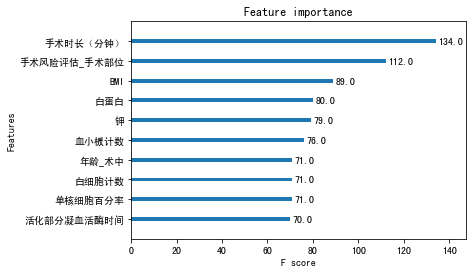

In [107]:
df_X_qs_remove_fill = fill_value(df_X_qs_remove, 'mean')
a = select_xgboost(df_X_qs_remove_fill, y)

In [109]:
a.to_excel('/home/yx/3090/project/P_prediction/Data/肺部并发症预测/xgb_new.xlsx')

In [88]:
def StandardScaler(data):
    data=(data-data.mean())/data.std()
    return data

In [89]:
def select_lasso(x, y):
    lasso = Lasso(alpha=0.01, max_iter=100000)
    lasso.fit(x, y)
    # 相关系数
    return lasso.coef_

In [94]:
df_X_qs_remove_fill = fill_value(df_X_qs_remove, 'mean')
data = StandardScaler(df_X_qs_remove_fill)
conf = select_lasso(data, y)
result = pd.DataFrame(conf, index=df_X_qs_remove_fill.columns)
result[result[0] != 0].to_excel('/home/yx/3090/project/P_prediction/Data/肺部并发症预测/lasso_new.xlsx')